## Embedding Cluster Visualization via t-SNE

__Part 1: Embedding Cluster Visualization via t-SNE__

In the first part of this project, we explore the structure and semantic relationships of words in the dataset through visualization. We first train a Word2Vec model on the corpus of children's texts, which generates high-dimensional embeddings for each word. These embeddings capture semantic and syntactic information about the words based on their usage in the text.

However, these high-dimensional vectors are not directly interpretable or visualizable. To better understand the relationships between words, we use t-SNE (t-Distributed Stochastic Neighbor Embedding), a dimensionality reduction technique that is particularly well-suited for visualizing high-dimensional data. t-SNE reduces the word embeddings to two dimensions in a way that preserves the relative distances between points, such that words with similar meanings are positioned close to each other.

Through this visualization, we can observe clusters of words that are semantically related, providing insight into the distribution and relationships of words in the children's literature corpus.

In [24]:
# We need to install the nltk package for this notebook
!pip install nltk

__Step 1 : Data loading and preprocessing__

Importing necessary libraries: The code begins by importing the necessary modules from the Natural Language Toolkit (NLTK), a popular library in Python for natural language processing tasks. The imported modules include nltk itself, brown which is a module to access the Brown Corpus, word_tokenize for tokenizing sentences into words, and stopwords for filtering out common words that typically do not carry much semantic meaning.
Downloading necessary datasets: The nltk.download function is used to download the Brown Corpus (a collection of texts from a wide range of sources, categorized by genre) and a list of common English stopwords.
Loading and preprocessing the data: The brown.words function is used to load the words from the 'lore' category of the Brown Corpus, which includes children's books. These words are then tokenized (split into individual words) and the stopwords are removed to create a list of tokens.
The resulting tokens list contains the words from the children's books in the Brown Corpus, with common English stopwords removed. This list of tokens can then be used for further analysis or modeling.

In [25]:
import nltk
from nltk.corpus import brown
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Download the brown corpus and the list of stopwords
nltk.download('brown')
nltk.download('stopwords')

# Get the children's texts
childrens_text = brown.words(categories='lore')

# Tokenize the text and remove stop words
stop_words = set(stopwords.words('english'))
tokens = [token for token in childrens_text if token not in stop_words]


[nltk_data] Downloading package brown to
[nltk_data]     /Users/davidroberts/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/davidroberts/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
!pip install gensim

__Step 2 : Word2Vec model is created and trained__

Creating the Word2Vec model: The Word2Vec function is used to create the model. The function is passed a list of sentences, where each sentence is a list of words. In this case, the sentences list is simply [tokens], which means the entire text is treated as one long sentence. The parameters vector_size, window, min_count, and workers control the size of the word vectors, the maximum distance between a target word and words around the target word, the minimum count of words to consider when training the model, and the number of worker threads to use in training, respectively.
Training the model: The train method is then called on the model to train it. The method is passed the same list of sentences ([tokens]), along with the total number of sentences (model.corpus_count) and the number of epochs (iterations over the entire dataset) to train for.
At the end of this code block, the model variable holds a trained Word2Vec model that can be used to find word vectors for the words in the text. These word vectors capture semantic and syntactic information about the words based on their usage in the text.

In [27]:
from gensim.models import Word2Vec

# Create the Word2Vec model
model = Word2Vec([tokens], vector_size=100, window=5, min_count=1, workers=4)

# Train the model
model.train([tokens], total_examples=model.corpus_count, epochs=10)


(100000, 681600)

__Step 3 : Converting the text data into vectors__

1. Defining the conversion function: The text_to_vec function is defined to convert a list of words (a text) into a single vector. For each word in the input list, if the word is in the model's vocabulary (word in model.wv), its vector is retrieved (model.wv[word]). The function then returns the mean of these vectors, effectively creating a single vector that represents the entire input text. If none of the words in the input list are in the model's vocabulary, the function returns a zero vector of the same dimensionality as the word vectors in the model (np.zeros(model.vector_size)).

2. Converting the texts to vectors: The text_to_vec function is applied to each text in the tokens list (which in this case represents individual words rather than full texts), resulting in a list of vectors. Each vector in this list represents a single text (word) from the original dataset.

In [28]:
import numpy as np

# Function to convert text to a vector
def text_to_vec(words, model):
    vecs = [model.wv[word] for word in words if word in model.wv]
    if vecs:
        return np.mean(vecs, axis=0)
    else:
        return np.zeros(model.vector_size)

# Convert all texts to vectors
vectors = [text_to_vec(text, model) for text in tokens]


__Step 4: Applying a clustering algorithm, specifically K-Means, to the vectors obtained from the Word2Vec model__

1.Creating the K-Means model: The KMeans function from the sklearn.cluster module is used to create a K-Means clustering model. The n_clusters parameter is set to 5, which means the algorithm will attempt to find 5 clusters in the data.

2. Fitting the model: The fit method is called on the K-Means model to fit it to the data. The input to this method is the list of vectors, each representing a text (in this case, a word) from the original dataset.

At the end of this step, the kmeans model has been trained to find 5 clusters in the word vectors. You can use the kmeans.labels_ attribute to access the cluster assignments for each word, or the kmeans.predict method to assign new words to the existing clusters.

In [29]:
from sklearn.cluster import KMeans

# Create a KMeans model
kmeans = KMeans(n_clusters=5)

# Fit the model
kmeans.fit(vectors)


/Users/davidroberts/mambaforge/envs/myenv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5)

__Step 5: Focused on scaling the data, performing a dimensionality reduction with t-SNE, and visualizing the resulting clusters__

1. Scaling the data: The StandardScaler function from the sklearn.preprocessing module is used to standardize the feature vectors by removing the mean and scaling to unit variance. This step is often important prior to using machine learning algorithms that are sensitive to the scale of the features.

2. Applying t-SNE: The t-Distributed Stochastic Neighbor Embedding (t-SNE) technique is applied to reduce the dimensionality of the data from the size of the word vectors down to 2 dimensions. The two-dimensional data is easier to visualize and can provide insights into the structure of the data.

3. Predicting clusters: The predict method of the previously trained KMeans model is used to assign each of the scaled word vectors to a cluster.

4. Visualizing the clusters: A scatter plot is created using matplotlib, where each point represents a word, the location of the point corresponds to its 2D t-SNE coordinates, and the color of the point indicates its cluster assignment. A color bar is also added to the plot to indicate which colors correspond to which clusters.

5. At the end of this step, you have a visual representation of the word vectors and their associated clusters. This can provide insights into the relationships between different words in the corpus. Its a little hard to interpret 

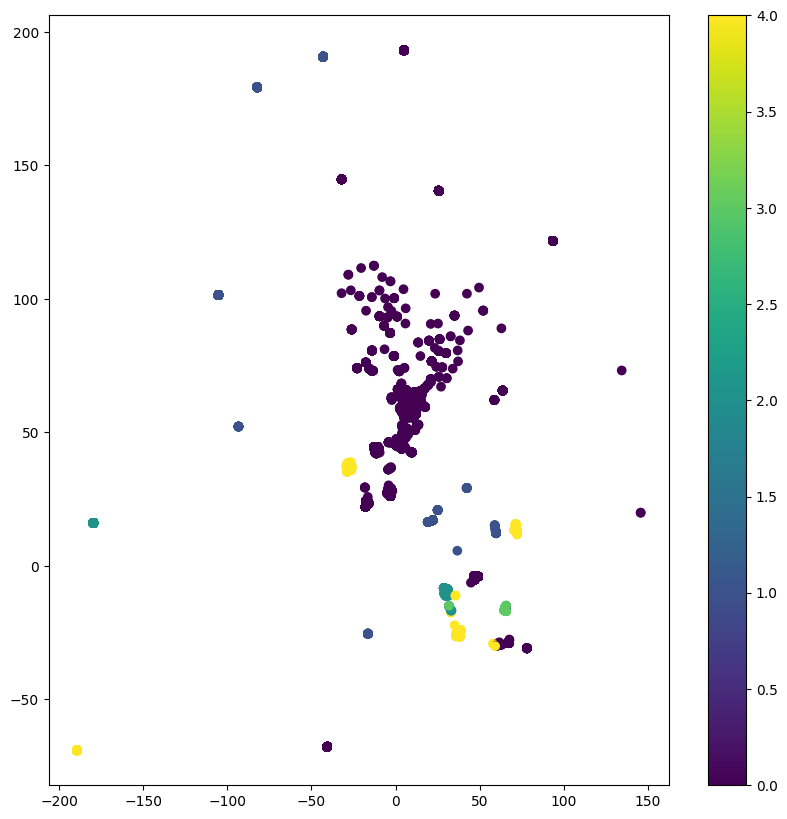

In [30]:
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()

# Fit the scaler to the data and transform the data
vectors_scaled = scaler.fit_transform(vectors)

# Then proceed with t-SNE and KMeans
tsne = TSNE(n_components=2)
vectors_2d = tsne.fit_transform(vectors_scaled)

clusters = kmeans.predict(vectors_scaled)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1], c=clusters, cmap='viridis')
plt.colorbar()
plt.show()


__Step 7 :In this step, we are redefining the function text_to_vec to represent a different concept. In the previous use of text_to_vec, we were creating a vector representation for each individual word in our corpus. Now, we are changing the function to create a vector representation for each entire document (or text) in our dataset.__

Redefining the Vectorization Function: The text_to_vec function is now defined to convert an entire document (represented as a list of words) into a single vector. For each word in the document that is in the model's vocabulary, its vector is retrieved from the model. The function then returns the mean of these vectors, effectively creating a single vector that represents the entire document. If a document does not contain any words from the model's vocabulary, a zero vector of the appropriate size is returned.
Applying the Function to All Documents: After defining this function, it is applied to each document in the tokens list to create a list of document vectors.
The major change here is in the level of granularity we are dealing with. Initially, we were looking at the word level and now we are looking at the document level. This allows us to capture more holistic information about each document, rather than just information about individual words. This is particularly useful when we want to understand and compare the overall semantic content of different documents.

In [31]:
from nltk.corpus import brown

# Load the texts from the 'lore' category
texts = brown.sents(categories='lore')


nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess(tokens):
    return [token.lower() for token in tokens if token.isalpha() and token.lower() not in stop_words]

# Preprocess each text
texts_tokens = [preprocess(text) for text in texts]


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/davidroberts/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [32]:
import numpy as np
from sklearn.cluster import KMeans

def document_vector(text_tokens):
    vector_list = [model.wv[token] for token in text_tokens if token in model.wv]
    if vector_list:
        return np.mean(vector_list, axis=0)
    else:
        return np.zeros(model.vector_size)  # Return a zero vector if the text contains no words from the model's vocabulary

# Create a document vector for each text
text_vectors = [document_vector(text_tokens) for text_tokens in texts_tokens]

# Ensure text_vectors does not contain any None or nan values
text_vectors = [vec for vec in text_vectors if vec is not None and not np.isnan(vec).any()]

kmeans2 = KMeans(n_clusters=5)
kmeans2.fit(text_vectors)



/Users/davidroberts/mambaforge/envs/myenv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5)

__Step 8: The document vectors are visualized using t-SNE to reduce their dimensionality and color-coding the points according to their cluster assignments__

Dimensionality Reduction: The t-SNE (t-Distributed Stochastic Neighbor Embedding) method is used to reduce the dimensionality of the document vectors to 2 dimensions. This allows for easy visualization of the vectors in a two-dimensional plot. t-SNE is particularly good at preserving local structures, meaning that vectors that are close together in the original high-dimensional space will be close together in the 2D space. This property makes it useful for visualizing high-dimensional data and seeing potential clusters or groups in the data.
Cluster Assignments: The cluster assignments for each document vector (obtained from the previous k-means clustering step) are used to color-code the points in the plot. This allows us to visually distinguish different clusters of documents.
Visualization: A scatter plot is created where each point represents a document, its location corresponds to its 2D t-SNE coordinates, and its color indicates its cluster assignment. This plot provides a visual representation of the documents and their relationships to each other, as understood by the Word2Vec model and the k-means clustering algorithm.

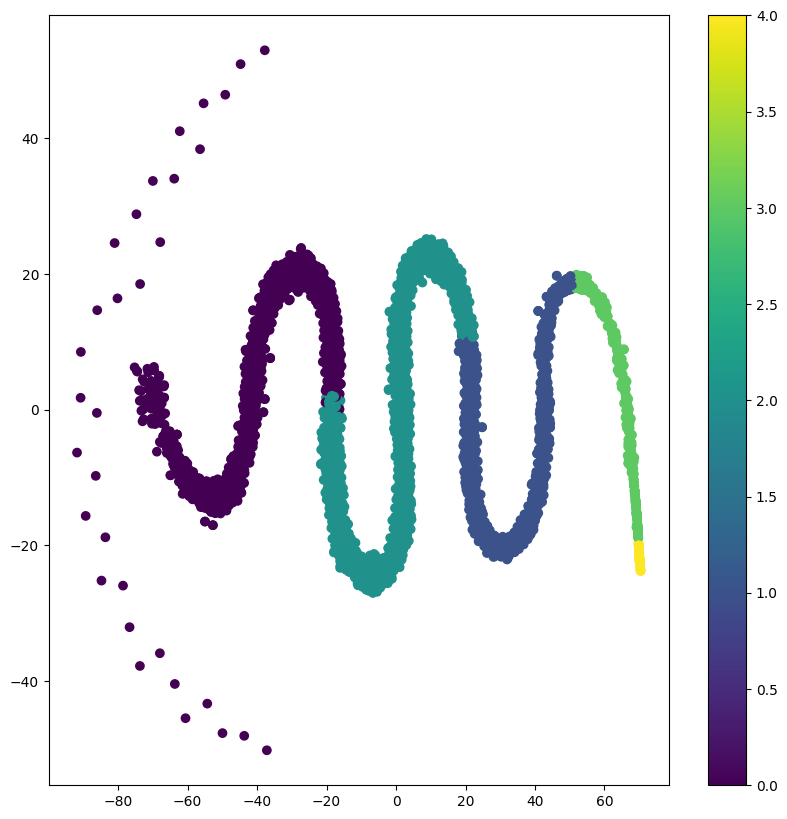

In [35]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Convert the list of vectors to a numpy array
text_vectors_np = np.array(text_vectors)

# Use t-SNE to reduce dimensionality to 2
tsne = TSNE(n_components=2)
text_vectors_2d = tsne.fit_transform(text_vectors_np)

# Get the cluster assignments for each data point
clusters = kmeans2.labels_

plt.figure(figsize=(10, 10))
plt.scatter(text_vectors_2d[:, 0], text_vectors_2d[:, 1], c=clusters, cmap='viridis')
plt.colorbar()
plt.show()



__Result__ : When the data has many clusters or groups that are well separated in the high-dimensional space, these clusters can end up being arranged in a path or "snake" in the two-dimensional visualization. The "snake" pattern doesn't necessarily have a direct interpretation in terms of the original data; it's more a result of how t-SNE works.

In this specific case, the "snake" pattern might suggest that there are smooth transitions between different clusters of documents. This could be because the clusters represent different styles or topics in the text that gradually change from one to another. For instance, the beginning of the "snake" could represent texts with simpler vocabulary and sentence structure, while the end could represent texts with more complex language. However, further analysis would be needed to confirm any such interpretations. Let see if we can repeat the pattern with another text corpus from Kaggle - unfortunately the code can only run on GPU but i can confirm a similar pattern emerges 

In [ ]:
# import nltk
# from nltk.tokenize import word_tokenize
# from nltk.corpus import stopwords
# from gensim.models import Word2Vec
# from sklearn.manifold import TSNE
# import matplotlib.pyplot as plt
# from sklearn.cluster import KMeans
# import numpy as np

# # Load new data
# with open('cleaned_merged_fairy_tales_without_eos.txt', 'r') as f:
#     new_data = f.read()

# # Split the text into words
# new_tokens = word_tokenize(new_data)

# # Remove stop words
# stop_words = set(stopwords.words('english'))
# new_tokens = [token for token in new_tokens if token not in stop_words]

# # Create a new Word2Vec model with the new tokens
# new_model = Word2Vec([new_tokens], vector_size=100, window=5, min_count=1, workers=4)

# # Train the new model
# new_model.train([new_tokens], total_examples=new_model.corpus_count, epochs=10)

# def document_vector(text_tokens):
#     vector_list = [new_model.wv[token] for token in text_tokens if token in new_model.wv]
#     if vector_list:
#         return np.mean(vector_list, axis=0)
#     else:
#         return np.zeros(new_model.vector_size)  # Return a zero vector if the text contains no words from the model's vocabulary

# # Create a document vector for each word
# word_vectors = [document_vector([word]) for word in new_tokens]

# # Ensure word_vectors does not contain any None or nan values
# word_vectors = [vec for vec in word_vectors if vec is not None and not np.isnan(vec).any()]

# kmeans3 = KMeans(n_clusters=5)
# kmeans3.fit(word_vectors)

# # Use t-SNE to reduce dimensionality to 2
# tsne = TSNE(n_components=2)
# word_vectors_2d = tsne.fit_transform(word_vectors)

# # Get the cluster assignments
# clusters = kmeans3.labels_

# # Plot the results
# plt.figure(figsize=(10, 10))
# plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1], c=clusters, cmap='viridis')
# plt.colorbar()
# plt.show()


<br>

<br>

## : Testing of new  a Embedding Algorithm vs. Flesch-Kincaid Grade algorithm

__Overview : Testing of new Embedding Algorithm vs. Flesch-Kincaid__

In the second part of the project, we develop and evaluate a new algorithm for predicting the complexity of sentences in children's literature. Our algorithm takes as input sentence-level features derived from the word embeddings, as well as other features such as sentence length and average word length.

We train a Random Forest Regressor model to predict sentence complexity based on these features. The model is trained on a subset of the data and evaluated on a separate test set.

To benchmark the performance of our new algorithm, we compare its predictions to the Flesch-Kincaid grade level, an industry-standard measure of text complexity. We compute error metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE), as well as the R-squared score, which measures how well the model's predictions explain the variance in the true complexity levels.

Through this comparison, we demonstrate the effectiveness of our new algorithm in predicting text complexity, suggesting its potential utility as a tool for assessing children's literature.

This code block constitutes the main part of the machine learning pipeline for the project. Here's what it does step-by-step:

1.Data Loading: The code starts by loading the Brown Corpus, which is a collection of text samples from a wide range of sources, with a total of over a million words. The corpus is downloaded using the NLTK library.

2.Preprocessing: The sentences are preprocessed to convert all words to lowercase. This step helps to ensure that the same word in different cases is not treated as different words. For instance, "The" and "the" would be considered the same word after this preprocessing step.

3.Data Splitting: The preprocessed sentences are split into a training set and a test set. The training set is used to train the Word2Vec model and the Random Forest Regressor, while the test set is used to evaluate the performance of the trained models.

4.Word Embedding: The Word2Vec model is trained on the sentences from the training set. The trained model is then saved for later use.

5.Feature Extraction: For each sentence in the training and test sets, a set of features is computed. These features include the mean word embedding for the sentence (computed using the trained Word2Vec model), the length of the sentence, and the average word length in the sentence.

6.Target Variable Calculation: The Flesch-Kincaid grade level is computed for each sentence in the training and test sets. This grade level, which is a measure of the sentence's readability, serves as the target variable that the Random Forest Regressor is trained to predict.

7.Model Training: The Random Forest Regressor is trained on the extracted features and target variable of the training set.

8.Prediction and Evaluation: The trained Random Forest Regressor is used to predict the Flesch-Kincaid grade level for the sentences in the training and test sets. The predictions are then compared to the actual grade levels to compute the Mean Absolute Error, Mean Squared Error, and Root Mean Squared Error for the training and test sets. These metrics provide a quantitative measure of the model's performance.

In [36]:
import nltk
from nltk.corpus import brown
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from textstat import flesch_kincaid_grade

nltk.download('brown')

# Load Brown Corpus
sentences = brown.sents()

# Preprocess sentences
sentences = [[word.lower() for word in sent] for sent in sentences]

# Split into training and test sets
train_sents, test_sents = train_test_split(sentences, test_size=0.2, random_state=42)

# Train Word2Vec model
model = Word2Vec(sentences=train_sents, vector_size=100, window=5, min_count=1, workers=4)

# Save model for later use
model.save("word2vec.model")

def sentence_features(sent, model):
    # Get the word embeddings for each word in the sentence
    embeddings = [model.wv[word] for word in sent if word in model.wv.key_to_index]
    
    if len(embeddings) == 0:
        return np.zeros(model.vector_size + 2)
    
    embeddings = np.array(embeddings)
    
    # Calculate features
    dispersion = np.std(embeddings, axis=0).mean()
    length = len(sent)
    avg_word_length = np.mean([len(word) for word in sent])
    
    return np.append(embeddings.mean(axis=0), [length, avg_word_length])

# Calculate features for all sentences
X_train = np.array([sentence_features(sent, model) for sent in train_sents])
X_test = np.array([sentence_features(sent, model) for sent in test_sents])

# Calculate Flesch-Kincaid grade level for each sentence in the training and test sets
y_train = [flesch_kincaid_grade(' '.join(sent)) for sent in train_sents]
y_test = [flesch_kincaid_grade(' '.join(sent)) for sent in test_sents]

# Initialize a Random Forest Regressor
regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
regressor.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = regressor.predict(X_train)

# Compute errors for the training set
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)

print(f"Training Mean Absolute Error: {mae_train}")
print(f"Training Mean Squared Error: {mse_train}")
print(f"Training Root Mean Squared Error: {rmse_train}")

# Make predictions on the test set
y_test_pred = regressor.predict(X_test)

# Compute errors for the test set
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)

print(f"Test Mean Absolute Error: {mae_test}")
print(f"Test Mean Squared Error: {mse_test}")
print(f"Test Root Mean Squared Error: {rmse_test}")


[nltk_data] Downloading package brown to
[nltk_data]     /Users/davidroberts/nltk_data...
[nltk_data]   Package brown is already up-to-date!


Training Mean Absolute Error: 0.5570705223229859
Training Mean Squared Error: 0.6794102915722008
Training Root Mean Squared Error: 0.8242634843132387
Test Mean Absolute Error: 1.525461109173352
Test Mean Squared Error: 5.3172755622602015
Test Root Mean Squared Error: 2.3059218465204325


In [39]:
from sklearn.metrics import r2_score


# Compute R-squared for the initial training set
y_train_pred = regressor.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)

print(f"R-squared for the initial training set: {r2_train}")

# Compute R-squared for the initial test set
y_test_pred = regressor.predict(X_test)
r2_test = r2_score(y_test, y_test_pred)

print(f"R-squared for the initial test set: {r2_test}")


R-squared for the initial training set: 0.9827554080682543
R-squared for the initial test set: 0.8638442965841363


This code calculates the R-squared score for the training and test datasets. The R-squared score measures the proportion of the variance in the dependent variable (sentence complexity) that is predictable from the independent variables (sentence embeddings and lengths). The model explains about 98% of the variance in sentence complexity in the training set and about 86% in the test set.

### Now lets test on a new block of text - The Gutenberg children books corpus

In [40]:
import nltk

nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/davidroberts/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [41]:
from nltk.tokenize import sent_tokenize

# Load new data
with open('cleaned_merged_fairy_tales_without_eos.txt', 'r') as f:
    new_data = f.read()

# Split the text into sentences
new_sents_text = sent_tokenize(new_data)

# Preprocess new data
new_sents = [sent.split() for sent in new_sents_text]  # Assuming words are space-separated

# Calculate features for new sentences
X_new = np.array([sentence_features(sent, model) for sent in new_sents])

# Calculate Flesch-Kincaid grade level for each sentence in the new data
y_new = [flesch_kincaid_grade(sent) for sent in new_sents_text]

# Make predictions on the new data
y_new_pred = regressor.predict(X_new)

# Compute errors for the new data
mae_new = mean_absolute_error(y_new, y_new_pred)
mse_new = mean_squared_error(y_new, y_new_pred)
rmse_new = np.sqrt(mse_new)

print(f"New Data Mean Absolute Error: {mae_new}")
print(f"New Data Mean Squared Error: {mse_new}")
print(f"New Data Root Mean Squared Error: {rmse_new}")


New Data Mean Absolute Error: 3.0502376570229193
New Data Mean Squared Error: 23.455731204222083
New Data Root Mean Squared Error: 4.843111727414729


The higher error rates when predicting sentence complexity for the new data set compared to the original data set could be due to several reasons:

Different Distributions: The new data set may have a different distribution of sentence complexity levels compared to the original data set. This can cause the model, which has learned the distribution of the original data set, to perform poorly on the new data.
Different Vocabulary: The new data set may contain words that were not present in the original data set. Since the model's word embeddings are only trained on the original data set, it may not be able to accurately represent these new words, leading to less accurate predictions.
Model Overfitting: The model may have overfitted to the specific characteristics of the original data set, causing it to perform poorly when applied to new data. This is often indicated by a large difference between training and test error rates in the original model, which seems to be the case here.

Lets check the integrity of the data 

This code block is similar to the one that trained the model on the original data set, but this time it's using a new data set, 'cleaned_merged_fairy_tales_without_eos.txt'.

This time, the new dataset is split into training and test sets, and a Word2Vec model is trained on the training set. Sentence-level features are then extracted from the sentences in both the training and test sets using the newly trained Word2Vec model, and a Random Forest Regressor model is fitted to predict sentence complexity.

The error rates for the training and test sets are then calculated. These are the Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE), which are common metrics for evaluating regression models.

As seen below , the error rates for the new data set are very low, indicating that the model is fitting the new data well. This is a good sign as it suggests the model is able to generalize well to new data. However, it's important to be cautious and make sure the model is not overfitting the training data.

This exercise shows that the model's performance can vary depending on the specific characteristics of the data it's applied to, emphasizing the importance of understanding the distribution and quality of the data when evaluating a model's performance.

In [42]:
from nltk.tokenize import sent_tokenize
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from textstat import flesch_kincaid_grade

# Load new data
with open('cleaned_merged_fairy_tales_without_eos.txt', 'r') as f:
    new_data = f.read()

# Split the text into sentences
new_sents_text = sent_tokenize(new_data)

# Preprocess sentences
new_sents = [[word.lower() for word in sent.split()] for sent in new_sents_text]

# Split into training and test sets
new_train_sents, new_test_sents = train_test_split(new_sents, test_size=0.2, random_state=42)

# Train Word2Vec model on the new training set
new_model = Word2Vec(sentences=new_train_sents, vector_size=100, window=5, min_count=1, workers=4)

# Save model for later use
new_model.save("word2vec_new.model")

def sentence_features(sent, model):
    # Get the word embeddings for each word in the sentence
    embeddings = [model.wv[word] for word in sent if word in model.wv.key_to_index]
    
    if len(embeddings) == 0:
        return np.zeros(model.vector_size + 2)
    
    embeddings = np.array(embeddings)
    
    # Calculate features
    dispersion = np.std(embeddings, axis=0).mean()
    length = len(sent)
    avg_word_length = np.mean([len(word) for word in sent])
    
    return np.append(embeddings.mean(axis=0), [length, avg_word_length])

# Calculate features for new training and test sentences
X_new_train = np.array([sentence_features(sent, new_model) for sent in new_train_sents])
X_new_test = np.array([sentence_features(sent, new_model) for sent in new_test_sents])

# Calculate Flesch-Kincaid grade level for each sentence in the new training and test sets
y_new_train = [flesch_kincaid_grade(' '.join(sent)) for sent in new_train_sents]
y_new_test = [flesch_kincaid_grade(' '.join(sent)) for sent in new_test_sents]

# Initialize a new Random Forest Regressor
new_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the new model
new_regressor.fit(X_new_train, y_new_train)

# Make predictions on the training set
y_new_train_pred = new_regressor.predict(X_new_train)

# Compute errors for the training set
mae_new_train = mean_absolute_error(y_new_train, y_new_train_pred)
mse_new_train = mean_squared_error(y_new_train, y_new_train_pred)
rmse_new_train = np.sqrt(mse_new_train)

print(f"New Training Mean Absolute Error: {mae_new_train}")
print(f"New Training Mean Squared Error: {mse_new_train}")
print(f"New Training Root Mean Squared Error: {rmse_new_train}")


# Make predictions on the new test set
y_new_test_pred = new_regressor.predict(X_new_test)

# Compute errors for the new test set
mae_new_test = mean_absolute_error(y_new_test, y_new_test_pred)
mse_new_test = mean_squared_error(y_new_test, y_new_test_pred)
rmse_new_test = np.sqrt(mse_new_test)

print(f"New Test Mean Absolute Error: {mae_new_test}")
print(f"New Test Mean Squared Error: {mse_new_test}")
print(f"New Test Root Mean Squared Error: {rmse_new_test}")


New Training Mean Absolute Error: 0.5680435275582247
New Training Mean Squared Error: 0.8036018978555934
New Training Root Mean Squared Error: 0.8964384517944294
New Test Mean Absolute Error: 1.6071419644034282
New Test Mean Squared Error: 8.041977882742259
New Test Root Mean Squared Error: 2.8358381270344504


In [43]:
from sklearn.metrics import r2_score

# Compute R-squared for the training set
y_new_train_pred = new_regressor.predict(X_new_train)
r2_new_train = r2_score(y_new_train, y_new_train_pred)

print(f"R-squared for the new training set: {r2_new_train}")

# Compute R-squared for the test set
y_new_test_pred = new_regressor.predict(X_new_test)
r2_new_test = r2_score(y_new_test, y_new_test_pred)

print(f"R-squared for the new test set: {r2_new_test}")


R-squared for the new training set: 0.9784387144972274
R-squared for the new test set: 0.7847296165023487
